<a href="https://colab.research.google.com/github/LakshmiDeviHarini/FML-LAB/blob/main/Univariate_on_company_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression on company dataset**


**Importing the required libraries and modules**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

importing the data and viewing the first 5 rows of the dataset to understand the what type of data present in it

In [12]:
data = pd.read_csv("/content/Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Now remove the label data from the input data.Now , X contains the data except the label data and Y contains the labeled data

In [13]:
X = data.drop('TV', axis=1).values
y = data['TV'].values

In [14]:
X_Sales = X[:,2]
print(X_Sales)


[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6 12.6 17.4  9.2 13.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  17.5  5.6 20.5  9.7 17.  15.  20.9
 18.9 10.5 21.4 11.9 13.2 17.4 11.9 17.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 17.9  8.5 16.1 10.6 23.2 19.8  9.7 16.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 20.7 14.  16.  11.3 11.  13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 17.3 11.3 13.6
 21.7 20.2 12.  16.  12.9 16.7 14.   7.3 19.4 22.2 11.5 16.9 16.7 20.5
 25.4 17.2 16.7 23.8 19.8 19.7 20.7 15.   7.2 12.   5.3 19.8 18.4 21.8
 17.1 20.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  16.6 15.2 19.7 10.6
  6.6 11.9 24.7  9.7  1.6 17.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 12.3 10.3 18.2 25.4 10.9 10.1 16.1 11.6 16.6 16.
 20.6  3.2 15.3 10.1  7.3 12.9 16.4 13.3 19.9 18.  11.9 16.9  8.  17.2
 17.1 20.   8.4 17.5  7.6 16.7 16.5 27.  20.2 16.7 16.8 17.6 15.5 17.2
  8.7 26.2 17.6 22.6 10.3 17.3 20.9  6.7 10.8 11.9  5.9 19.6 17.3  7.6
 14.  1

Now get the shapes of both X_Sales and y

In [15]:
type(X_Sales), type(y)

(numpy.ndarray, numpy.ndarray)

In [16]:
X_Sales.shape, y.shape

((200,), (200,))

In [17]:
X_Sales = X_Sales.reshape(-1,1)
y = y.reshape(-1, 1)

In [18]:
X_Sales.shape, y.shape

((200, 1), (200, 1))

Plot the graph for X_Sales and y(label data)


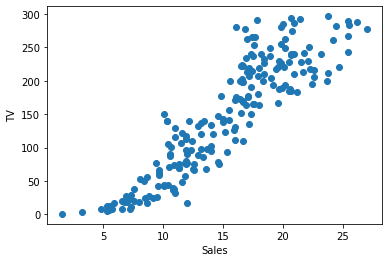

In [19]:
plt.scatter(X_Sales,y)
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

In [20]:
reg = linear_model.LinearRegression()
reg.fit(X_Sales, y)

LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_Sales)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 29.174878990120188
MSE = 1377.5212645151882
RMSE = 37.114973589040694
R_2 = 0.8121757029987414


In [22]:
prediction_space = np.linspace(min(X_Sales), max(X_Sales)).reshape(-1,1)

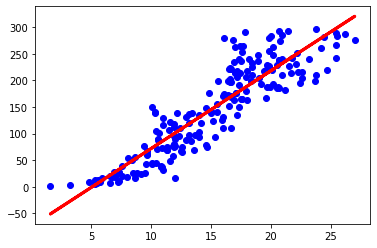

In [23]:
plt.scatter(X_Sales, y, color='blue')
plt.plot(X_Sales,reg.predict(X_Sales), color='red', linewidth=3)
plt.show()

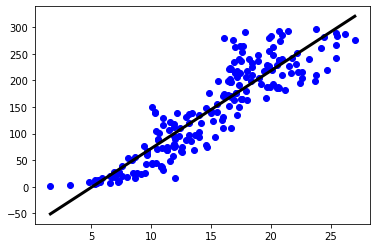

In [24]:
plt.scatter(X_Sales, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

Now split the data into training data and testing data in that 20% of data comes under training data and remaining 80% of data comes under the training data

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
After splitting of data find the shapes of train data as well as test data

In [26]:
X_train.shape, X_test.shape

((150, 3), (50, 3))

Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [27]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Now pass the X_train into the model so it display the y_pred1 values and find the errors.

In [28]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 22.572742121925454
MSE = 839.4391112513975
RMSE = 28.97307562637073
R_2 = 0.8833058149016721


Now pass the X_test into the model and we get predict values then find the errors

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 21.324287828735322
MSE = 749.1631054498223
RMSE = 27.370844076312704
R_2 = 0.8978781954734079


CONCLUSION : We can say that testing data best fits for the LinearRegression model that we trained.

